In [14]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ROCAUC




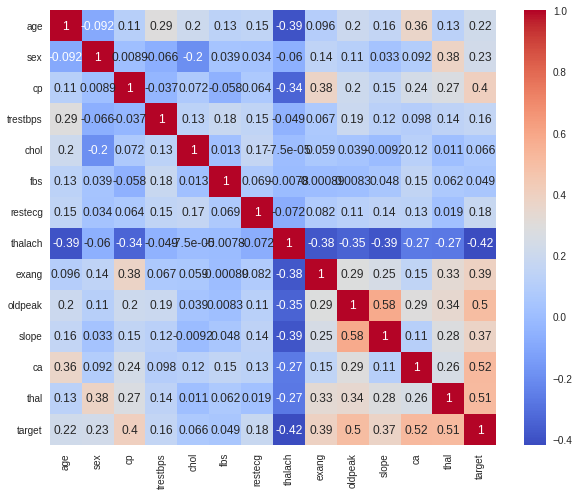

In [25]:

# Load the heart disease dataset and drop the "?" values
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None,na_values='?')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data.dropna(inplace=True)
corr_matrix = data.corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)





Full features without cross-validation and hyperparameter tuning

In [26]:
# Create a Gaussian Naive Bayes model
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:",acc_score)
print(classification_report(y_test, y_pred))

Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.18      0.22      0.20         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.08      0.33      0.13         3

    accuracy                           0.58        60
   macro avg       0.24      0.29      0.25        60
weighted avg       0.60      0.58      0.59        60



ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


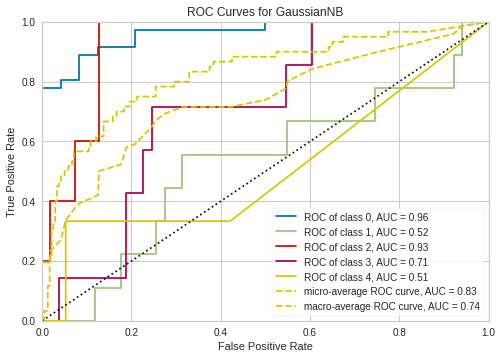

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
visualizer = ROCAUC(clf, classes=["0", "1", "2", "3", "4"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

Full features with cross-validation and hyperparameter tuning

In [28]:
# Create a Gaussian Naive Bayes model
clf = GaussianNB()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Perform grid search with 5-fold cross-validation
nb_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)
nb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [29]:
# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", nb_cv.best_params_)

y_pred = nb_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:",acc_score)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'var_smoothing': 0.0001}
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.30      0.33      0.32         9
           2       0.50      0.60      0.55         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.34      0.37      0.35        60
weighted avg       0.62      0.65      0.64        60



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


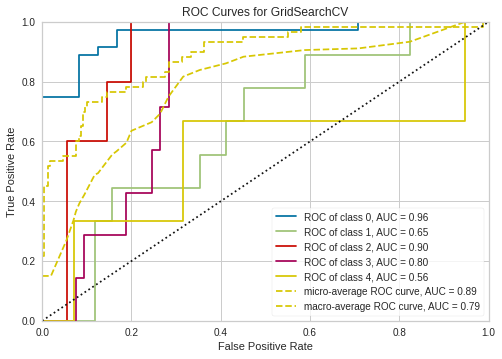

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [30]:
visualizer = ROCAUC(nb_cv, classes=["0", "1", "2", "3", "4"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

Removed "slope" feature due to high corr with oldpeak

In [31]:
drop_feature = ["slope"]
X_train.drop(drop_feature, axis=1, inplace=True)
X_test.drop(drop_feature, axis=1, inplace=True)

In [32]:
# Create a Gaussian Naive Bayes model
clf = GaussianNB()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Perform grid search with 5-fold cross-validation
nb_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)
nb_cv.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", nb_cv.best_params_)

y_pred = nb_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:",acc_score)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'var_smoothing': 0.0001}
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.36      0.44      0.40         9
           2       0.40      0.40      0.40         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.34      0.36      0.35        60
weighted avg       0.64      0.67      0.65        60



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


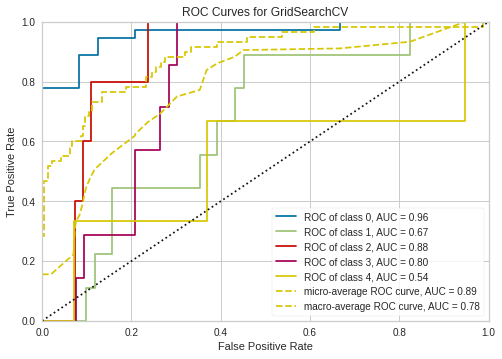

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
visualizer = ROCAUC(nb_cv, classes=["0", "1", "2", "3", "4"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure